In [ ]:
from collections import OrderedDict
from bs4 import BeautifulSoup

with open('4-response.html') as f:
    text = f.read()

soup = BeautifulSoup(text, 'html.parser')

d = OrderedDict()
soup

In [ ]:
soup.find_all('td')

In [10]:
import base64
import execjs
import requests


with open('src/md5.js') as f:
    jscode = f.read()

url_temp = 'http://match.yuanrenxue.com/api/match/4?page={page}'
s = execjs.compile(jscode)


def get_md5(raw):
    return s.call('hex_md5', raw)


def getlist(page):
    url = url_temp.format(page=page)
    # requests.getを使うと、レスポンス内容を取得できるのでとりあえず変数へ保存
    response = requests.get(url)

    # response.json()でJSONデータに変換して変数へ保存
    jsonData = response.json()

    return jsonData


def get_masking_class(key, value):
    s_bytes = (key + value).encode('ascii')
    base64_bytes = base64.b64encode(s_bytes)
    s_base64 = base64_bytes.decode('ascii')
    return get_md5(s_base64.replace('=', ''))

In [96]:
BeautifulSoup(getlist(1)['info'], 'lxml').find_all('td')[0].find_all('img')[0]['style']

'left:-22px'

In [102]:
def get_nums(html, display_filter):
    nums_bs4 = BeautifulSoup(html, 'lxml').find_all('td')
    def get_num_images(num_bs4):
        imgs_bs4 = num_bs4.find_all('img')
        imgs_bs4_display = list(filter(lambda img_bs4: display_filter not in img_bs4['class'], imgs_bs4))
        true_list = [-1] * len(imgs_bs4_display)
        for i in range(len(imgs_bs4_display)):
            true_postision = i + int(imgs_bs4_display[i]['style'].replace('left:', '').replace('px', '')) // 11
            assert true_postision >= 0 and true_list[true_postision] == -1
            true_list[true_postision] = imgs_bs4_display[i]['src']
            
        return true_list
    return map(get_num_images, nums_bs4)

In [103]:
data = getlist(1)
def mylist():
    for num in get_nums(data['info'], get_masking_class(data['key'], data['value'])):
        for img in num:
            yield img
t = [a for a in mylist()]
print(len(t))
print(len(set(t)))

39
10


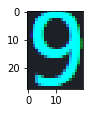

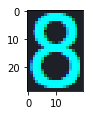

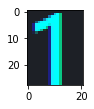

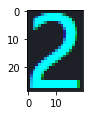

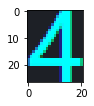

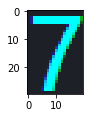

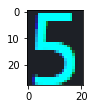

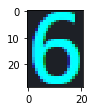

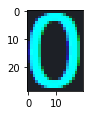

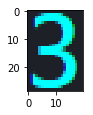

In [53]:
% matplotlib inline
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np

# Take in base64 string and return a numpy image array
def stringToRGB(base64_string):
    imgdata = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(imgdata))
    return np.array(image)
numslist = set(t)
for encoded_string in [s.replace('data:image/png;base64,', '') for s in numslist]:
    plt.figure(figsize=(1,3))
    plt.imshow(stringToRGB(encoded_string))

In [75]:
nums = [9, 8, 1, 2, 4, 7, 5, 6, 0, 3]
dic = {n[1]: n[0] for n in zip(nums, numslist)}
dictt = {n[0]: n[1] for n in zip(nums, numslist)}

In [76]:
from IPython import display
from base64 import b64decode
def print_num(num):
    encoded_string = dictt[num].replace('data:image/png;base64,', '')
    return display.Image(b64decode(encoded_string))

In [77]:
print_num(0)

In [71]:
import json


json = json.dumps(dic)
with open("num_dict.json","w") as f:
    f.write(json)

In [104]:
data = getlist(1)
def mylist():
    for num in get_nums(data['info'], get_masking_class(data['key'], data['value'])):
        yield int(''.join([str(dic[n]) for n in num]))
print(list(mylist()))

['6', '0', '8', '1']
['2', '9', '1', '4']
['7', '3', '7', '8']
['6', '7', '3', '9']
['4', '0', '5', '6']
['9', '6', '8', '8']
['3', '0', '7']
['8', '4', '3', '4']
['3', '8', '0', '7']
['8', '8', '9', '8']
[6081, 2914, 7378, 6739, 4056, 9688, 307, 8434, 3807, 8898]


01 23 23 1-3,2-1,3-4,4-2



In [84]:
ttt = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABQAAAAdCAIAAAAl5NuSAAADUElEQVQ4EZ1UX0hTURi/u7vbmV29ztwiuwvSQOYegj2kIqXlg5DkgxQlaInCVIiepKQgMss9ZEFQUlkPIZgz+gfiopDA5cMUApMYvejTBuVVi93m3dH96d57zrl3ExVpG7vf953f7/u+c7/fOYaDh0qp//0wWxBPd0vt9WsuOwQgqSxDEBXYoD+n7z4dyYIbsis7Ey8GV2scMAuDHRqGC0Z699z+oi0a862FxOETo69+HbMniM9AaEomGeWrhNIMJ7lPmKJ+05yIIDRBUtSNwZVKLqX6ZiFQ1FRb5DyyT/nVOvom83Az3ErP4DqPSVrleulei8gqUTo8ub+qyxjB6SlKNMz5LfO8ob4Myi0wdto+a/mg7F6rfHzDjvJB6/glAzIz/wPXcoMCCsRcjcgg5DZ+HUMjzN1Mkm7TAu4FbU1eIOSQaMQwc7pCJ+xsEfLMDIgipCPeXL4Vh193laA4G8bTImRqOCcYRo5YdwtWb6anB57/dqHgIvvYjyyNTBk6e20L6kBAydLQdGzAky5TMdUe+HZ66WyJ+lJg/msvmMGpsxXGN8V911ccQHslGIUfMO+T19rp04LanNWI+J0JJZiaKkkduAZCBjv1wHpz2KCNn6IyK/Opp8PLdbqwaQqaIJUEQBOsLO/CvouWl/h8aHuWhT32kzBzFiYONNXyxYo8i4pleU5Y1VmkgEPoH1trw/okbbcNrjaXklfSVXDhGZ0lz49gfNFSczK2V9YnK7md7Pg7WsQiKY+3V0jqzswhH3dFP3T6tiN+0OqzouPBVfztUbSgtl3RKjkQDOZOeXXCJivizQnhwyVWeuSJqOQ6HseobYWN8jAL5CqxO+S3qJI5sLGpyC7cNCYLUYDRtmTbTrykw4aXYVQ+SGrlkUULjnGxBs/2bE/czaFVWogQcuSRJYQpcXeHNsbsLM7EaMcf0mFe0CdfGGjOojFclmpE0gdSTaPhMDTPf9OVeKZ7bah/2cUizdNCoPDcE5msyzN95/1yc1k8o5wZQvU+ApAUlBdpuGjrOAUCCo4oTE7z2ccKJfTR0jiBJhn50sX3LsppCQdsLefNX5GXURkHKGfq6mWpoTxm5zYAhfoEMGoKzeaOPDS9+UFgylNvOzO6S/sfNQgekSrMrRAAAAAASUVORK5CYII="

In [87]:
dic['data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABUAAAAdCAIAAADKJrCsAAADAklEQVQ4EaWVX0hTURzHz7brzt30bqLcfNgN0kFtPZR7mgQqhASlPkx6MB98iBZICWL0IESISKZoSCBRSeKg7CHsQfNB7KF82faQ9aK9GBR3D3XFP9fadrY2u3fn/nZv2wyhy4V7fr/f9/M7v3POb2em4ydOov94mH+xXYPxy42J0zzBOJPTWYlsXY9yz+4xizEKmkrP7w3Gn/TuCDhbOv2XmtqL1lyo1PxdU7t3W/axjjKEWFQLpzGiGQ8gWMQ3jcg6TCrC887Jp+aIVi3yBtJ91/cuAI1QQf2BRPT+Fp8LE5Ef6mZfAKkjCHk9aOMzdZiN/oPHN7cpjOTq0UNgBQBYGRr5YLxZoMtj117aZ0rNbJwtNzbww62wZyI3OlGkLO3I866Uz5umKTejbKS0utib5zvTbi1q33xdrDvMA+fX5iHagcs4HFXVbbcSPYFfbj6R85sRYcUN+8KsbWzJmAt4H5/S3LJl2ZV9OL3VXkcMwizCcaE+3lOP2wNVnUEGNhfq5zm6eIRSB33TEsBWQrDyGhIRoen7Uui3S3NpfIZ3gMa1316XQqQ8POe6dKrGc+aY8taeF4beOGVNknX4d8e7qQHzA600eRIT56sbVVcGzRt5b8w00+/onXfCkhINHalcCcU8Mosr3O3VPKoP3g9wyyIA3mSfGgFTVyEuPGEymMahafRTOdgpQV2CxlskWBySmXXYXJDq39hHKwgJ79V5JO2X6aojjegvBepfjsEhOTLCkXibpG4v8JEIhsKSvuChCfx+AgdtkdUrAHgUYtckiiV9rfRsirNke87+1LwSu6C2eZ5H5kdRTot5d2ZH8jecnqVtaq9Zu17KNlfZRTWi8yjSz4VlaqfcHVsrDzJ+6FLkyQ6HtsdbYHKxcmiAnnHB/ddIVqZ+uGErEVL6X9VhDI2nGHLl837ujtZgFmdltVqH9nxj3n61NZxL8pjWn2EY9YWwmYhVE9cqxj6Ao/D+BX/XSPxqY1xQ/nnohU9sUsz+bs42GTL93VwF9QN/5O8fGRn4ilT2qk0AAAAASUVORK5CYII=']

6

In [88]:
dic['data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABUAAAAcCAIAAAABemMJAAAAyElEQVQ4EWOUVVBjoAAw4dWr8Xfm3lf3b75ZHodLGQsuCYaovs/l3h/4QPKcOBUxYOqX/p+Y8y3J+6MM+1/c2uAySPrNA38nRXyxMPjGx/APLk+IAdcf921W9VuwayFamF8/4eST+cJOwACs4fdJYHO9lNlC9p8ENAOl4faDlDL/fM13cD1XUy/TUyAPZ5iDlMIAXP9eztwbXIdOwcSJpeH6nzIeAllKKsDqfxIMGdVPQmBhUToaflgChQSh0fAjIbCwKB3o8AMADiotC5QUM1oAAAAASUVORK5CYII=']

1

In [89]:
dic['data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABQAAAAdCAIAAAAl5NuSAAACy0lEQVQ4EZ1UTWgTQRSeJNtsNyXbxmZF3BWkgpocRC9NDyYn8RD04A9YKKRUiCAV8VAPimg9VEE8KaV6Cg1YgxRyEAoePGgvaS+tCLYg7Sk5yBooW9Nk003i7My83c2mFnVZeN977/vem3m7M54jR4+j/324DqHcGrtVHTn3SxF13kx6kc6rmz3zs8KzvIvsaessD9dy98sK33SxiOtXP/ePprk1O+e1oZzaWXisOpS8ruPXB4y6lPiRyxoy+Oai2CMbLyfKInMCK2/l5ImDJ0/h9/DwVLio00RTjG09T4HEEo893TpDtoiQUJjqvzzptZa3lBXij8Iqk1SHRmsxhmlnuX41VqURfbVvImvVBpAXZpYE5iiVm5coJGI5rUdZJlDIcSWQOG0m1wPNd6JJOlEivn66wnia8Mn9PaDCgn9DY1ga2CVjM8WNqLzLwiUuA+QO6/tW6mJBsXHeREQswZRVtfOnsYtsaJAVDbJNLE42QIu0n2QbNr8NzZX84NeVYQwxOdxi3wgJqvV9gPVHa9bZr1OHcI2DkdEUFkcMa9kd9P0D/9TZXQqL3YtxU2xfsUdLgm2ddSliM/dAwRYEfdo6hli87oUxNHmYO5Da7IWwAb5PW6biZUuMRDsNNIeNiiDWuBUzbi67q1hkFFE24LixiMM0ozI71vqmf85MmGJPoWQdt9rIoIPvhIP1YxL1uza+0P+UDCyTD8Bx2x5K73mBoSvpikK1evD9E4qIGOWFQpEiJCW0F3FnR4LjtTuJHYK86pLwiuWZxHN7NgQz3744vfU61bIuuliqujhdZm210Mwk0+D92lfvWLb8MEbLk8r46jStwfMN1knvnR8X7y4yDyFfb18/c1bxziOtswN1dmq5Bme+8GNooTcPgvc+WkoMHGLsfV3ozm/2KIeQFGryHJ2cX1ODKx8O3LjW/e67U4mxY9muzF+4vwHPdM7J2FS8qwAAAABJRU5ErkJggg==']

0